# Import

In [13]:
import pandas as pd
pd.set_option('display.max_columns', None)

import os, sys, warnings
warnings.filterwarnings("ignore")
sys.path.append('..')

from Class.Plotter import *

# Inputs

In [14]:
targets = ['Cases']
result_folder = '../results/total_target_cleaned_scaled'
figPath = os.path.join(result_folder, 'figures_best')
results = pd.read_csv(os.path.join(figPath, 'predictions_case_death.csv'))
results.head()

,FIPS,TimeFromStart,Predicted_Cases,Predicted_Deaths,Cases,Deaths,Date,split
0,10001,13,11.0,0.0,0.0,0.0,2020-03-13,train
1,10003,13,23.0,0.0,0.0,0.0,2020-03-13,train
2,10005,13,9.0,0.0,0.0,0.0,2020-03-13,train
3,1001,13,2.0,0.0,0.0,0.0,2020-03-13,train
4,1003,13,14.0,0.0,0.0,0.0,2020-03-13,train


In [15]:
support_path = '../../dataset_raw/Support files/'
population_filepath = os.path.join(support_path, 'Population.csv')
population = pd.read_csv(population_filepath)
sorted_fips = population.sort_values(by=['POPESTIMATE2019'], ascending=False)['FIPS'].values

In [16]:
results_top_500 = results[results['FIPS'].isin(sorted_fips[:500])]
results_bottom_500 = results[results['FIPS'].isin(sorted_fips[-500:])]

| Rurality cut | RuralityRange | MADRange|
|:---:|:---:|:---:|
| 1 | [3.501, 4.5] | [1, 2] |
| 2 | [4.501, 5.5] | [1, 2] |
| 3 | [3.501, 5.5] | [2, 3] |

In [17]:
rurality_filepath = os.path.join(support_path, 'Rurality_Median_Mad.csv')
rurality = pd.read_csv(rurality_filepath, encoding = 'latin1')

In [18]:
def get_rurality_cut(rurality, rurality_range, madrange):
    # do the median first
    locs = rurality[(rurality['Median'] > rurality_range[0]) & (rurality['Median'] <= rurality_range[1])].FIPS
    rurality = rurality[rurality['FIPS'].isin(locs)]

    # then mad
    locs = rurality[(rurality['MAD'] >= madrange[0]) & (rurality['MAD'] < madrange[1])].FIPS
    print(f'Number of locations {len(locs)}')
    return locs

In [19]:
locs = get_rurality_cut(rurality, [3.501, 4.5], [1, 2])
rurality_cut_1 = results[results['FIPS'].isin(locs)]

locs = get_rurality_cut(rurality, [4.501, 5], [1, 2])
rurality_cut_2 = results[results['FIPS'].isin(locs)]

locs = get_rurality_cut(rurality, [3.501, 5], [2, 3])
rurality_cut_3 = results[results['FIPS'].isin(locs)]

Number of locations 70
Number of locations 79
Number of locations 65


# Plots

In [20]:
plotter = PlotResults(figPath, targets)

## Population cut

### Train results

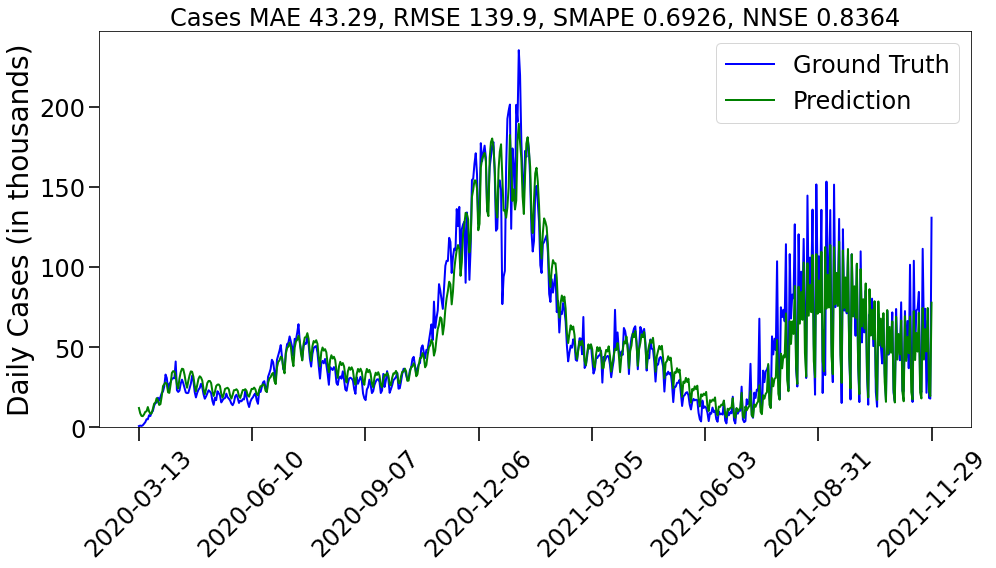

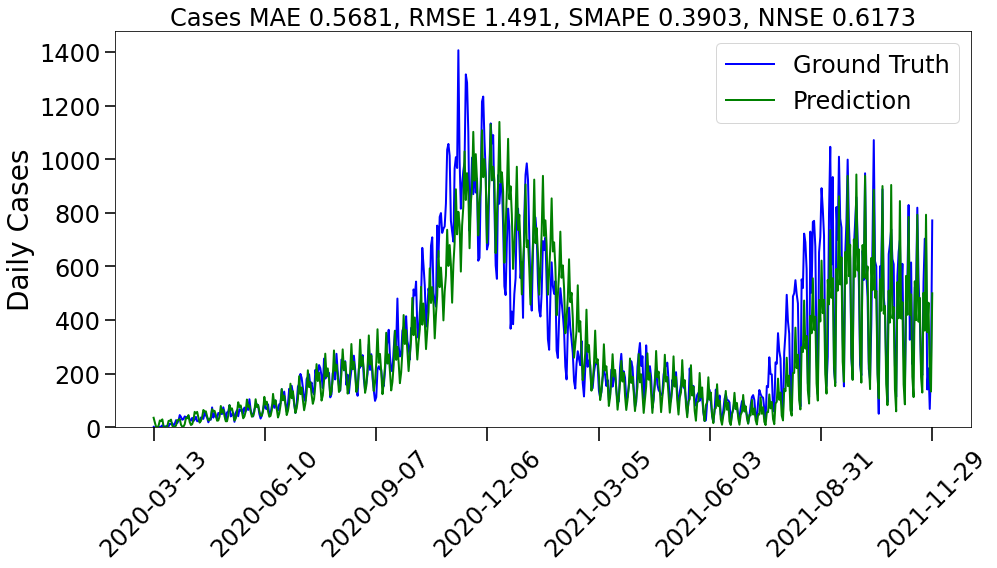

[<Figure size 1008x576 with 1 Axes>]

In [21]:
plotter.summed_plot(results_top_500[results_top_500['split']=='train'], type='Train', save=False)
plotter.summed_plot(results_bottom_500[results_bottom_500['split']=='train'], type='Train', save=False)

### Test results

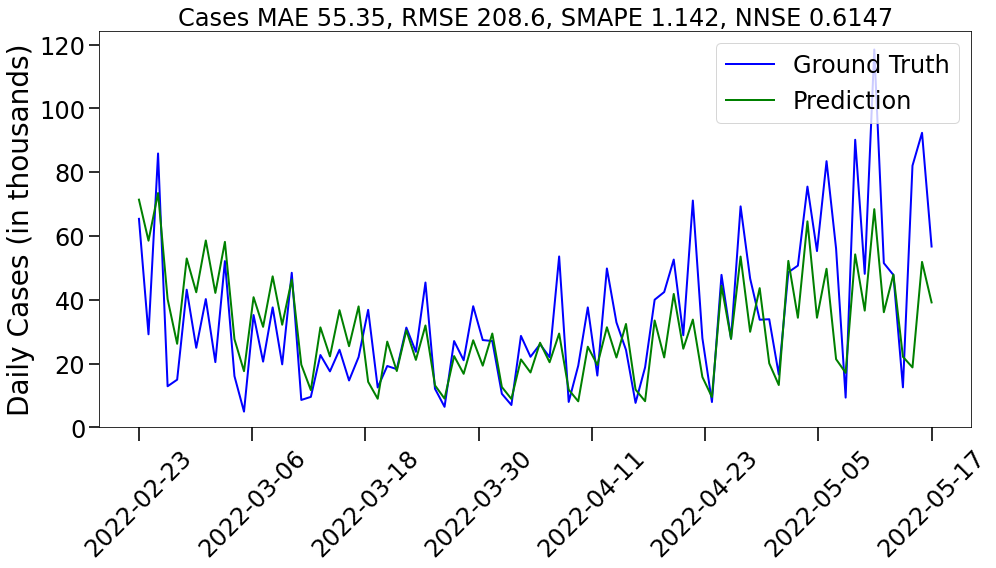

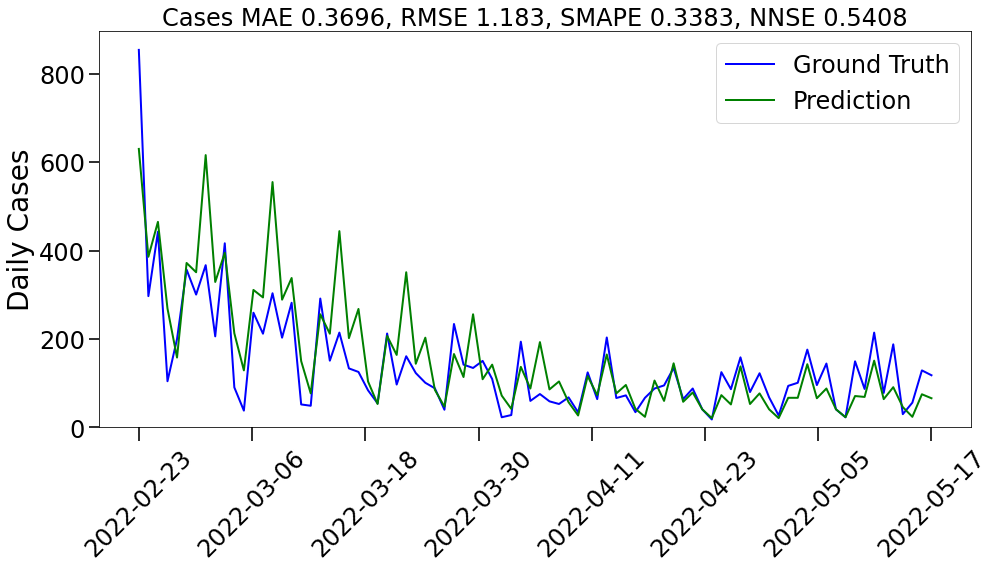

In [22]:
figures = plotter.summed_plot(results_top_500[results_top_500['split']=='test'], type='Test', save=False)
for index, target in enumerate(targets):
    figures[index].savefig(os.path.join(figPath, f'{target}_top_500_Test.jpg') , dpi=DPI)

figures = plotter.summed_plot(results_bottom_500[results_bottom_500['split']=='test'], type='Test', save=False)
for index, target in enumerate(targets):
    figures[index].savefig(os.path.join(figPath, f'{target}_bottom_500_Test.jpg') , dpi=DPI)

## Rurality cut

### Train result

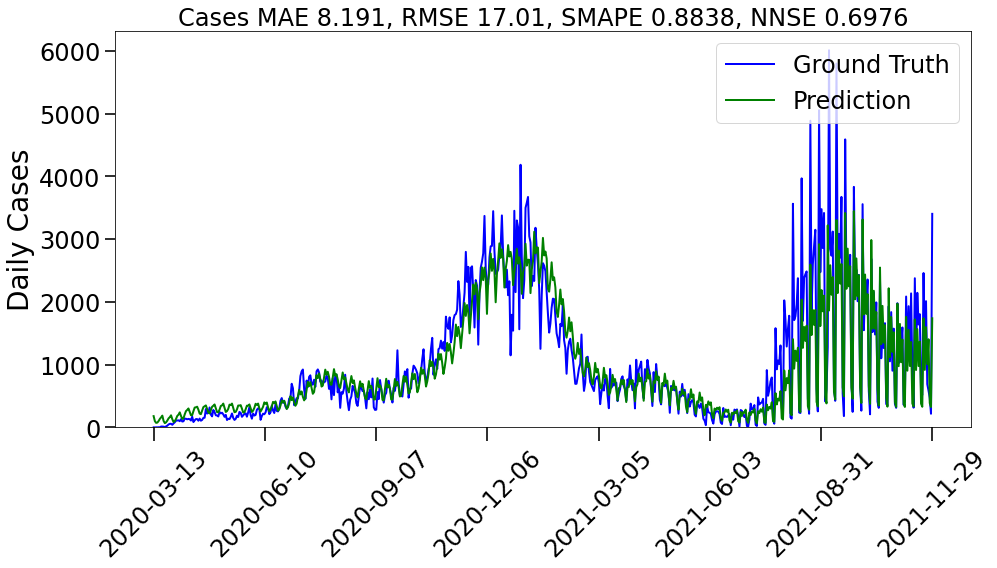

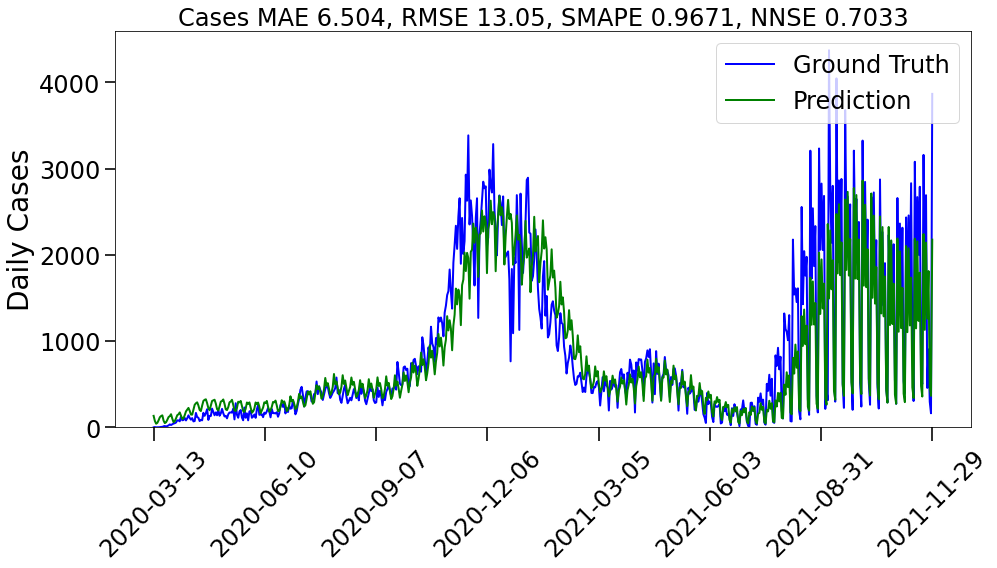

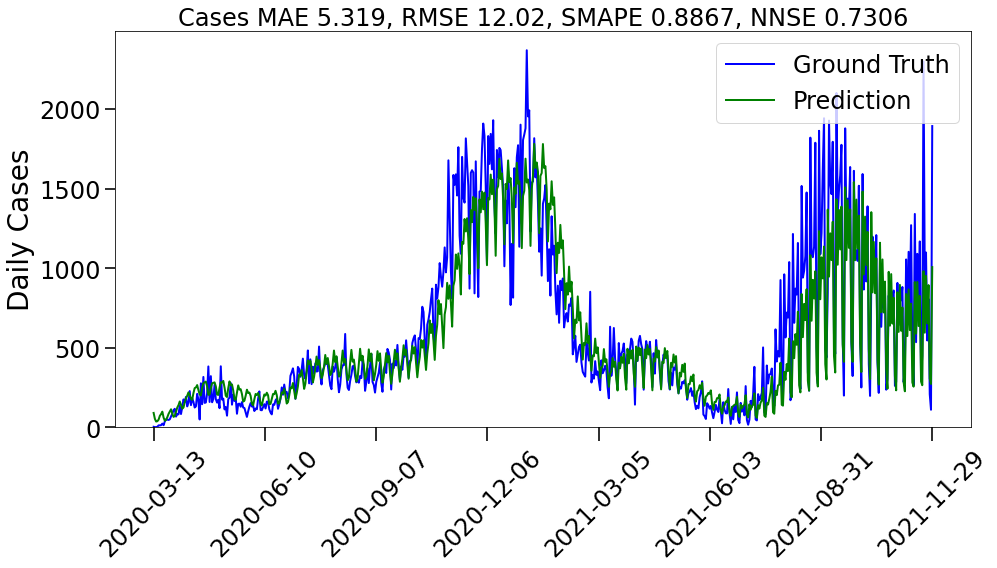

[<Figure size 1008x576 with 1 Axes>]

In [23]:
plotter.summed_plot(rurality_cut_1[rurality_cut_1['split']=='train'], type='Train', save=False)
plotter.summed_plot(rurality_cut_2[rurality_cut_2['split']=='train'], type='Train', save=False)
plotter.summed_plot(rurality_cut_3[rurality_cut_3['split']=='train'], type='Train', save=False)

### Test results

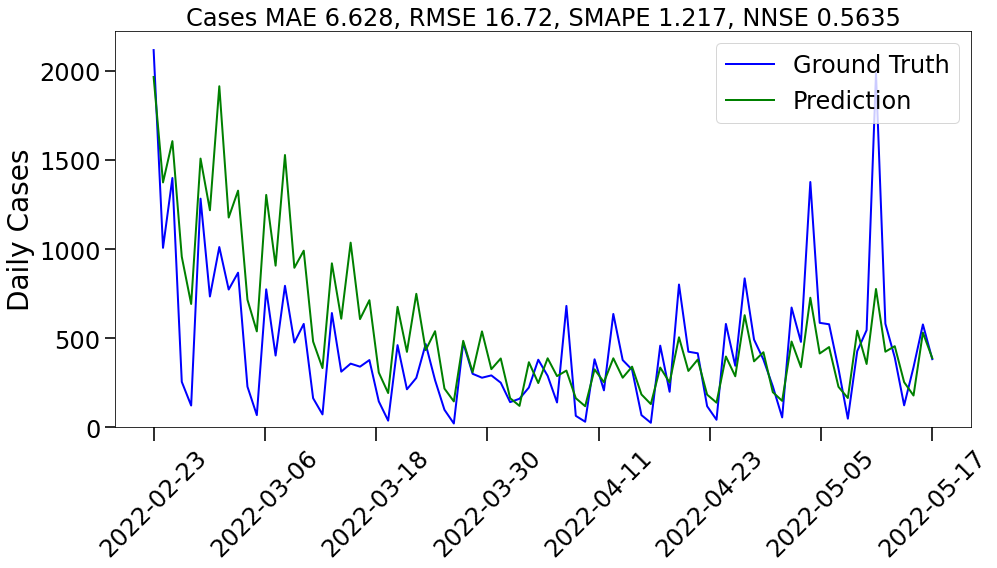

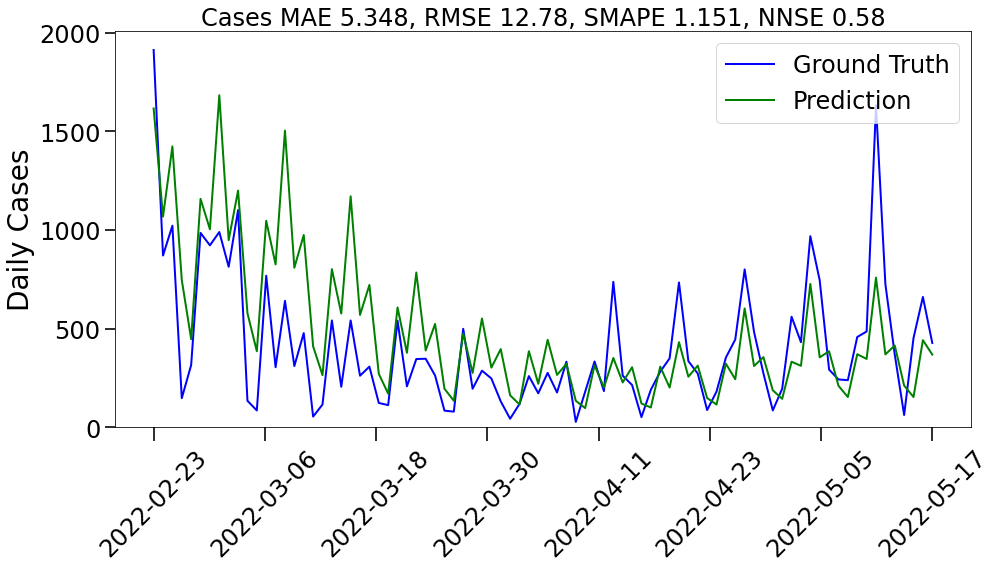

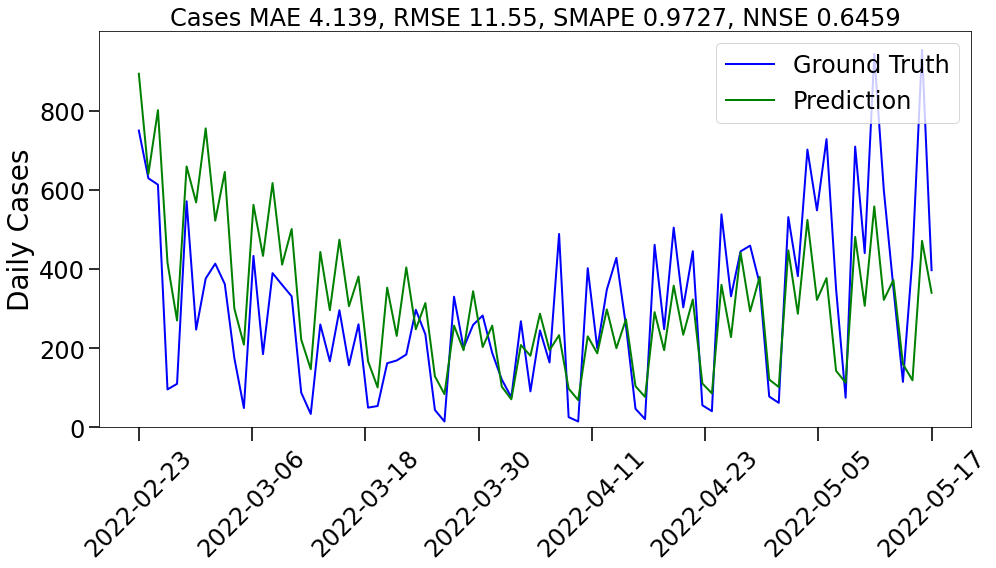

In [24]:
figures = plotter.summed_plot(rurality_cut_1[rurality_cut_1['split']=='test'], type='Test', save=False)
for index, target in enumerate(targets):
    figures[index].savefig(os.path.join(figPath, f'{target}_rurality_cut_1_Test.jpg') , dpi=DPI)

figures = plotter.summed_plot(rurality_cut_2[rurality_cut_2['split']=='test'], type='Test', save=False)
for index, target in enumerate(targets):
    figures[index].savefig(os.path.join(figPath, f'{target}_rurality_cut_2_Test.jpg') , dpi=DPI)

figures = plotter.summed_plot(rurality_cut_3[rurality_cut_3['split']=='test'], type='Test', save=False)
for index, target in enumerate(targets):
    figures[index].savefig(os.path.join(figPath, f'{target}_rurality_cut_3_Test.jpg') , dpi=DPI)